In [1]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [2]:
from Bio import SeqIO
from Bio.Seq import Seq                             #For alternative translation function.
from Bio.Data import CodonTable
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis  #For counting AA analysis function.
import matplotlib.pyplot as plt                     #For plotting the plots.
import seaborn as sns                               #Seaborn style for color palettes. 
from mpl_toolkits.mplot3d import Axes3D             #For 3D plots. 

# FUNCTIONS #

## 1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook.

In [3]:
def get_sequences_from_file(fasta_fn):  #defining a function that will get sequences from a fasta file.
    
    """
    Description: Reads a FASTA file and extracts sequence data, associating each sequence with its respective species name. 
    
    Arguments: (fatsa_fn): String, path to the FASTA file containing sequence data. 
    
    Return: Sequence data dictionary, containing species names and their corresponding sequences.

    """
    
    sequence_data_dict = {} 
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()              # Putting the sequences in a dictionary format.
        species_name = description[1] + " " + description[2]  #species name extraction.
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)                                #return the sequences from the file in a dictionary format.

## 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.

In [4]:
def translate_Nt_to_AA(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]  # Mapping codons to their corresponding amino acids based on the vertebrate mt genetic code.
    aa_seq_string = ''

    """
    Description: Translates DNA sequences into amino acid sequences using the vertebrate mitochondrial codon table.
    
    Arguments: (string_nucleotides): String, DNA sequence to be translated.
    
    Return: Amino acid sequence string, containing translated amino acid sequences.

    """
    # Translate each codon into an amino acid using the translation table
    
    for i in range(0, len(string_nucleotides), 3):  # Loop through every 3rd position of the string_nucleotides. 
        codon = string_nucleotides[i:i + 3]
        if codon in mito_table.stop_codons:         #Translation break at the stop codon.
            break
        aa = mito_table.forward_table[codon]         
        aa_seq_string += aa
    return aa_seq_string                            #returns the final aa_seq_string containing the concatenated amino acid sequence.

## 3. Alternate function for the translation.

In [5]:
def translation(string_nucleotides):    #alternative translation using Biopython's "translation" function. 

    """
    Description: Translates a DNA sequence into an amino acid sequence using BioPython's Seq object.
    
    Arguments: string_nucleotides: string, DNA sequence to be translated.
    
    Return: Translated amino acid sequence.

    """   
    Translated_seq = str(Seq(string_nucleotides).translate(table="Vertebrate Mitochondrial"))
    return Translated_seq

## 4. Write a function that calculates the molecular weight of each 3 amino acid sequence.

In [6]:
def compute_molecular_weight(aa_seq):     #defines a function for calculating moleculat weight using ProteinAnalysis of Biopython

    """
    Description: Calculates the molecular weight of an amino acid sequence using BioPython's ProteinAnalysis.
    
    Arguments: aa_seq: string, amino acid sequence for which molecular weight is to be calculated.
    
    Return: float, molecular weight of the amino acid sequence.

    """ 
    analysis = ProteinAnalysis(aa_seq[:-1])
    
    return analysis.molecular_weight()

## 5. Write a function that computes the GC-content of each DNA sequence.

In [7]:
def gcpercent(dna_seq):    

    """
    Description: Calculates the GC-content (proportion of "G" and "C") of a DNA sequence.

    Argument: dna_seq: string, DNA sequence for which GC-content is to be calculated.

    Retrurn: float, GC-content of the DNA sequence.
    
    """

    count_g = dna_seq.count('G')         #Counts G from the DNA sequence. 
    count_c = dna_seq.count('C')         #Counts C from the DNA sequence.
    countGC = count_g + count_c          # Adds G+C
    dnalen = len(dna_seq)                #Counts total number of bases/length of the DNA sequence. 
    gc_percent = countGC/dnalen * 100    #Gets the GC percentage. 
    return gc_percent

# MAIN #

In [8]:
cytb_seqs = get_sequences_from_file("/home/vedikaab/BCB546-PythonHW_Spring2024/Python_assignment_files/penguins_cytb.fasta") 

penguins_df = pd.read_csv("/home/vedikaab/BCB546-PythonHW_Spring2024/Python_assignment_files/penguins_mass.csv")  # Includes only data for body mass 
species_list = list(penguins_df.species)


## 6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.

In [9]:
# Add two new columns 'molecular_weight' and 'GC_content' filled with NaN values

penguins_df['molecular_weight'] = float('NaN')  #Initializing new column molecular weight with NaN values.  

penguins_df['GC_content'] = float('NaN')        #Initializing new column GC_content with NaN values.

(penguins_df.head())


,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN


## 7.  A for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame

In [10]:
for key, value in cytb_seqs.items():
    aa_seq = translation(str(value))             # Translate using translation function from Step 3.
    MW = compute_molecular_weight(aa_seq)        # Calculate molecular weight
    GC_content = gcpercent(str(value))           # Calculate GC content

    # Update DataFrame with calculated values
    penguins_df.loc[penguins_df['species'] == key, 'molecular_weight'] = MW
    penguins_df.loc[penguins_df['species'] == key, 'GC_content'] = GC_content
    
penguins_df.head()

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42328.4061,48.421053
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146


## 8. Plot a bar-chart of the mass with the x-axes labeled with species names.

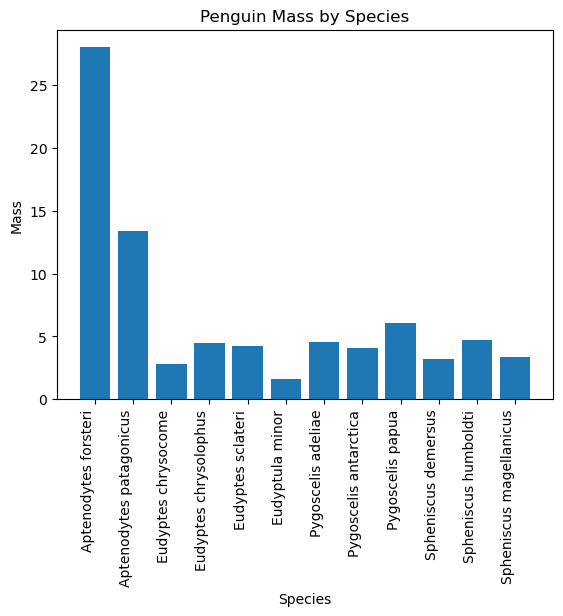

In [11]:
plt.bar(penguins_df["species"],penguins_df["mass"]) # Creating a bar plot. 
plt.xlabel('Species')                               #x and y axis labels.
plt.ylabel('Mass')
plt.title('Penguin Mass by Species')                # Title of the plot. 
plt.xticks(rotation=90, ha='right')  # Rotates x-axis labels for better readability
plt.show()


## *Q1* What is the smallest penguin species? 
### The smallest penguin species is "Eudyptula minor".

## *Q2* What is the geographical range of this species?
### "Eudyptula minor" is distributed extensively along the southern coastline of Australia, 
### reaching as far north as the South Solitary Island located off the coast of New South Wales. 
### They are also indigenous to the coastal regions of New Zealand (Hoskins et al., 2008) 

## 9. Plot a graph that shows the molecular weight as a function of GC content.

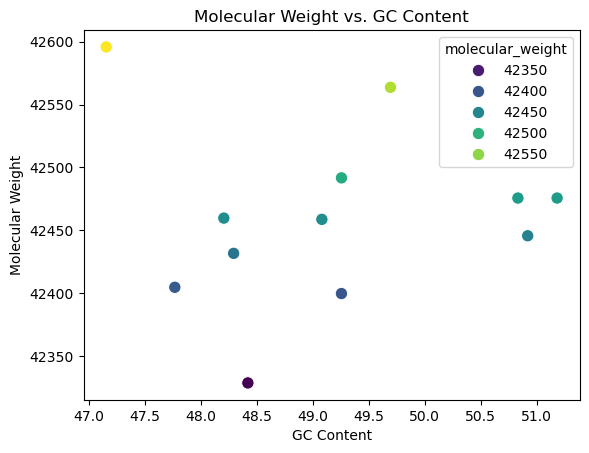

In [12]:
sns.set_palette("viridis") #settting color pallet
sns.scatterplot(data=penguins_df, x='GC_content', y='molecular_weight', hue='molecular_weight', palette='viridis', s=80) #hue indicates based on which value color pattern will change. 
##viridis is our palette, and s=80 indicates larger circle.
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight')
plt.title('Molecular Weight vs. GC Content')
plt.show()


## 10. Write the entire DataFrame to a new CSV file that includes your new columns.

In [13]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)   #Save data frame to CSV.

## 11. BONUS : 3D scatter plot for fun!

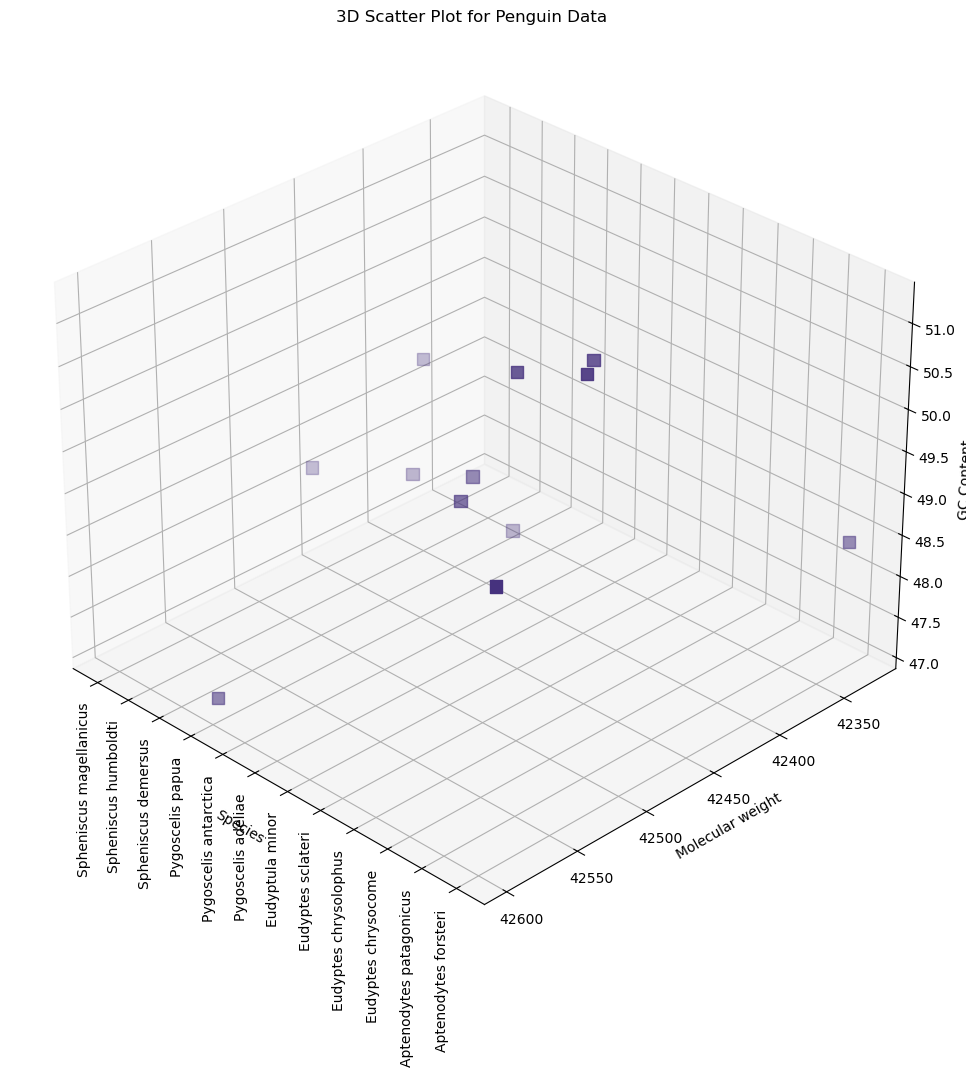

In [14]:
species = penguins_df['species']
molecular_weight = penguins_df['molecular_weight']
gc_content = penguins_df['GC_content']

species_indices = range(len(species)) # Assigning numeric indices to species.

#Creating a figure and a 3D axes
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot
ax.scatter(species_indices, molecular_weight, gc_content,c=sns.set_palette("pastel"), s=80, marker='s') 

# Setting x-axis tick labels to species names
ax.set_xticks(species_indices)
ax.set_xticklabels(species, rotation=90) 

#Labels and Titles
ax.set_xlabel('Species')
ax.set_ylabel('Molecular weight')
ax.set_zlabel('GC Content')
ax.set_title('3D Scatter Plot for Penguin Data')

ax.view_init(30, 135)# Rotating the plot for better visibility

# Show the plot
plt.show()

